# Treinamento usando funções Pytorch

Vamos substituir algumas funções que fizemos no notebook do módulo 1 por funções do Pytorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F

data = torch.from_numpy(np.loadtxt('../data/age_data_3.txt')).to(torch.float32)
inputs, targets = data.T

### Camada linear Pytorch

A camada linear do Pytorch nada mais é do que uma combinação linear das variáveis de entrada. Ela possui os atributos .weight e .bias que são iguais aos atributos a e b que usamos no nosos modelo linear

In [2]:
model = nn.Linear(in_features=1, out_features=1, bias=True)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.9056]], requires_grad=True)
Parameter containing:
tensor([0.6290], requires_grad=True)


In [3]:
#Modelos do Pytorch sempre esperam um tensor com tamanho NxC1xC2..., onde N é o número
#de instâncias que serão processadas e C1, C2, ... é a dimensão dos dados.
#Para imagens, os dados terão tamanho NxHxW, onde H é o número de linhas e W o número 
#de colunas das imagens. Mas nos dados deste notebook, cada instância possui um único 
#atributo (altura):
#                     dimensão Nx1
inputs = inputs.reshape(len(inputs),1)
targets = targets.reshape(len(targets),1)

res = model(inputs)
# imprime os 10 primeiros resultados
print(res[:10])
# O código acima faz a seguinte operação:
res_comp = model.weight*inputs + model.bias
print(res_comp[:10])

tensor([[-0.6207],
        [-0.4939],
        [-0.5482],
        [-0.6569],
        [-0.6297],
        [-0.3671],
        [-0.5482],
        [-0.4396],
        [-0.4486],
        [-0.4939]], grad_fn=<SliceBackward0>)
tensor([[-0.6207],
        [-0.4939],
        [-0.5482],
        [-0.6569],
        [-0.6297],
        [-0.3671],
        [-0.5482],
        [-0.4396],
        [-0.4486],
        [-0.4939]], grad_fn=<SliceBackward0>)


### Treinamento usando funções do Pytorch

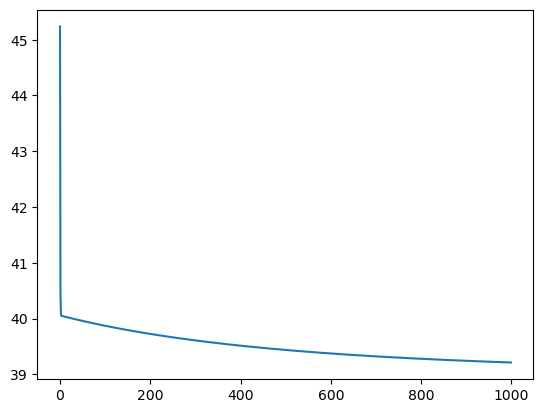

In [4]:
with torch.no_grad():
    model.weight[:] = 19.
    model.bias[:] = -25.

num_epochs = 1000
lr = 0.03
losses = []
for epoch in range(0, num_epochs):
    # Apaga os gradientes
    model.zero_grad()
    scores = model(inputs)

    # Por padrão o Pytorch calcula a média das entropias, que é o mais adequado.
    # Mas no notebook anterior usamos a soma
    loss = F.binary_cross_entropy_with_logits(scores, targets, reduction='sum')
    # A linha acima é equivalente a fazer:
    #probs = F.sigmoid(scores)
    #loss = F.binary_cross_entropy(probs, targets, reduction='sum')

    # Calcula os gradientes
    loss.backward()
    # Atualiza os gradientes
    with torch.no_grad():
        model.weight -= lr*model.weight.grad
        model.bias -= lr*model.bias.grad

    losses.append(loss.item())

plt.plot(losses)

### Treinamento usando um otimizador do Pytorch

Ao invés de implementar um passo do gradiente, podemos utilizar uma classe pronta para fazer isso:

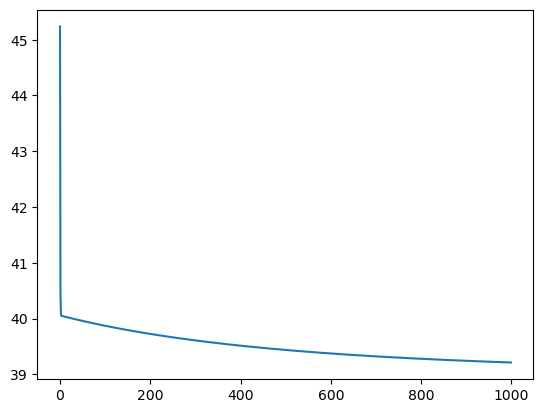

In [5]:
with torch.no_grad():
    model.weight[:] = 19.
    model.bias[:] = -25.

# Classe Stochastic Gradient Descent. Recebe como entrada os
# parâmetros do modelo e lr
sgd = torch.optim.SGD(model.parameters(), lr=lr)
losses = []
for epoch in range(0, num_epochs):
    # Apaga os gradientes
    sgd.zero_grad()
    scores = model(inputs)

    loss = F.binary_cross_entropy_with_logits(scores, targets, reduction='sum')

    # Calcula os gradientes
    loss.backward()
    # Atualiza os gradientes
    sgd.step()

    losses.append(loss.item())

plt.plot(losses)